# Breast Cancer Classification

Toy dataset provided by Scikit Learn

This is a practice notebook to play with `feature_engine` for filter-based dimensionality reduction.

We are able to reduce dimensionality by 47% and maintain performance

<br>
<br>
<br>
<br>

In [1]:
import pyforest
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns

# plt.style.use('dark_background')

plt.style.use('default')


<br>
<br>

## Load/Inspect Data

In [2]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

<br>
<br>

## Print a Description of the Data

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
print('Target Names: \n', cancer['target_names'])
print('Data shape:     \n', cancer.data.shape)
print('Feature Names: \n', cancer['feature_names'])

Target Names: 
 ['malignant' 'benign']
Data shape:     
 (569, 30)
Feature Names: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


<br>
<br>

## Convert the Data to a DataFrame

In [5]:
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=np.append(cancer['feature_names'], ['target']))
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890     0.0  
1                  0.1860          0.2750                  0.08902     0.0  
2                  0.2430          0.3613                  0.08758     0.0  
3                  0.2575          0.6638                  0.17300     0.0  
4                  0.1625          0.2364                  0.076

In [6]:
# flip the target labels so True indicates malignancy
cancer['target_names'] = ['benign', 'malignant']
df.target = df.target.replace({0:True, 1:False})

<br>
<br>

<br>
<br>

## Basic Exploratory Data Analysis

In [7]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

<br>
<br>

## We notice a class imbalance we'll have to deal with

<AxesSubplot:xlabel='target', ylabel='count'>

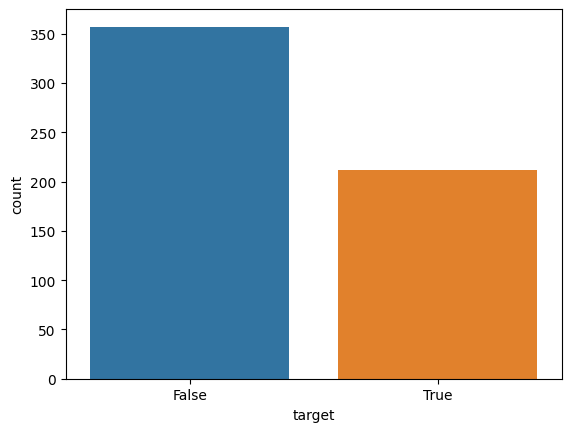

In [8]:
sns.countplot(x=df['target'])

<br>
<br>

## Here is an example of a pair of features

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

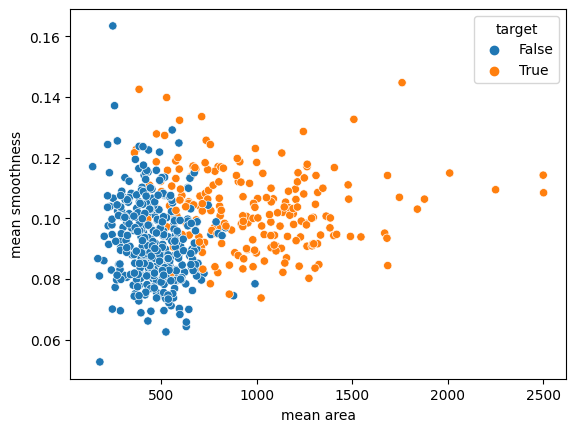

In [9]:
sns.scatterplot(data=df, x='mean area', y='mean smoothness', hue='target')

<br>
<br>

## Here is an example of a highly correlated feature pair

It's also worth noting that as both `mean area` and `worst area` get higher, the more likely it is to be malignant

<AxesSubplot:xlabel='mean area', ylabel='worst area'>

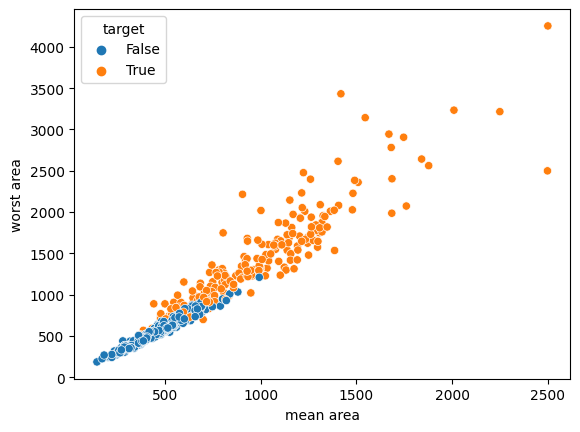

In [10]:
sns.scatterplot(data=df, x='mean area', y='worst area', hue='target')

<br>
<br>

### Here we see very strong correlation between various features

especially `mean radius <--> mean perimeter`!

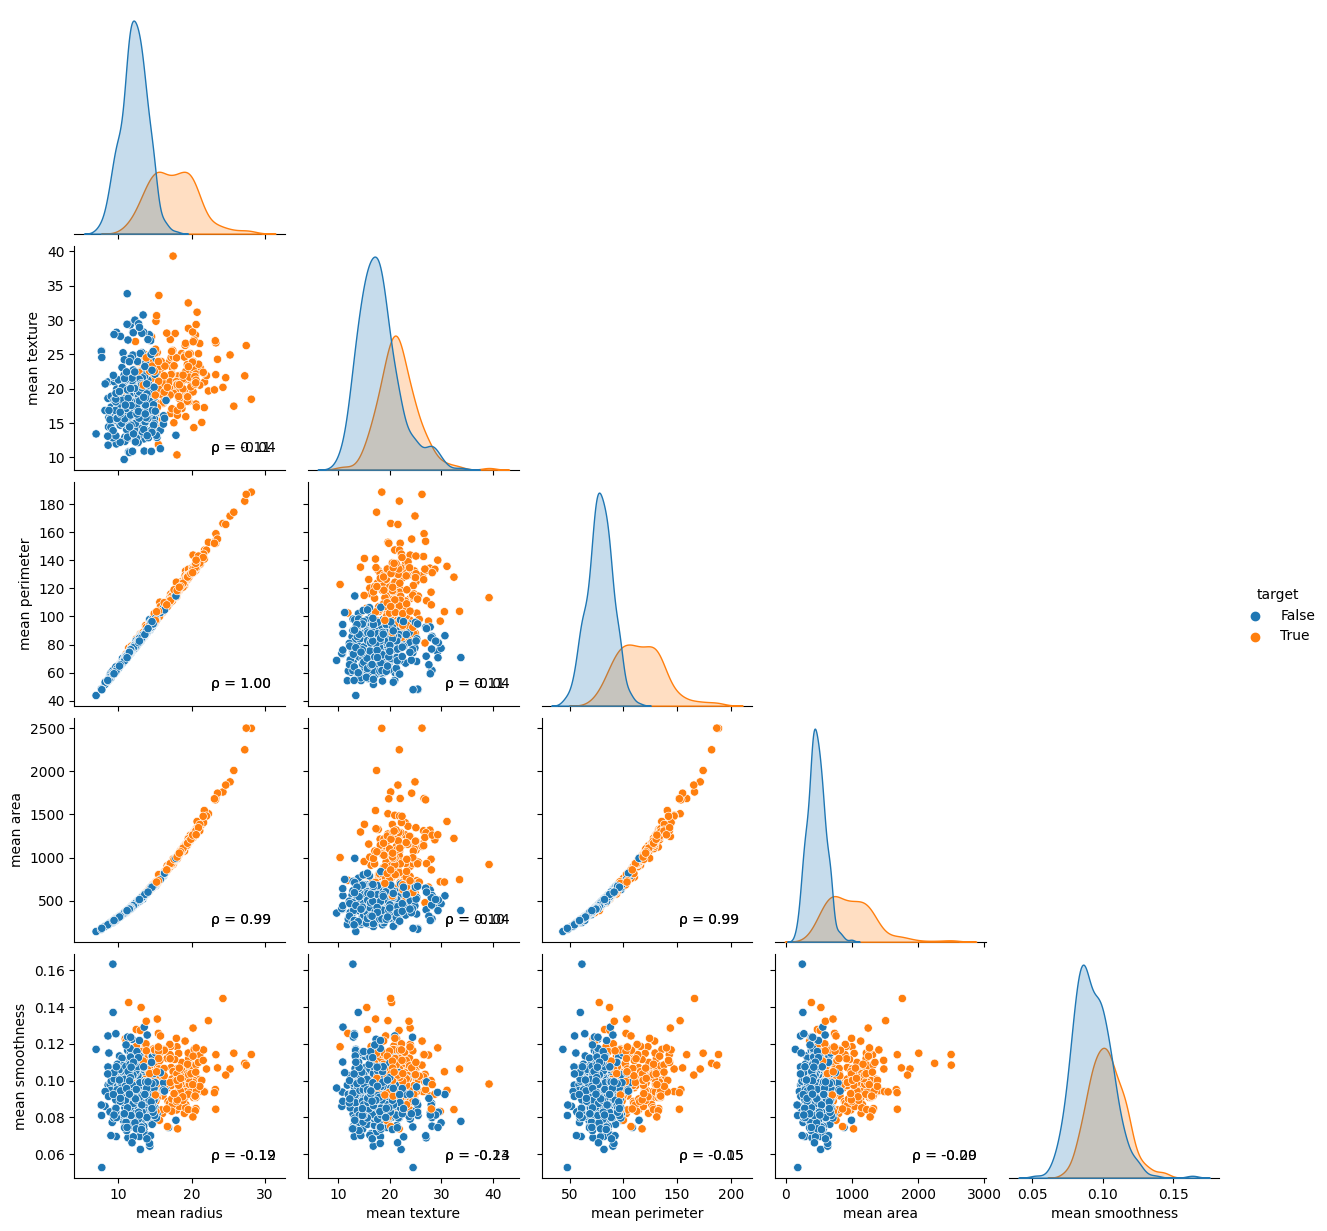

In [11]:
from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:1.2f}', xy=(.65, .08), xycoords=ax.transAxes)

sns.color_palette("bright")
plot = sns.pairplot(df, vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'], \
    hue='target', corner='True', y_vars=cancer['target_names'])

plot.map_lower(corrfunc)
plt.show()

<br>
<br>

## A Heatmap Shows a lot of Correlation between Features

<AxesSubplot:>

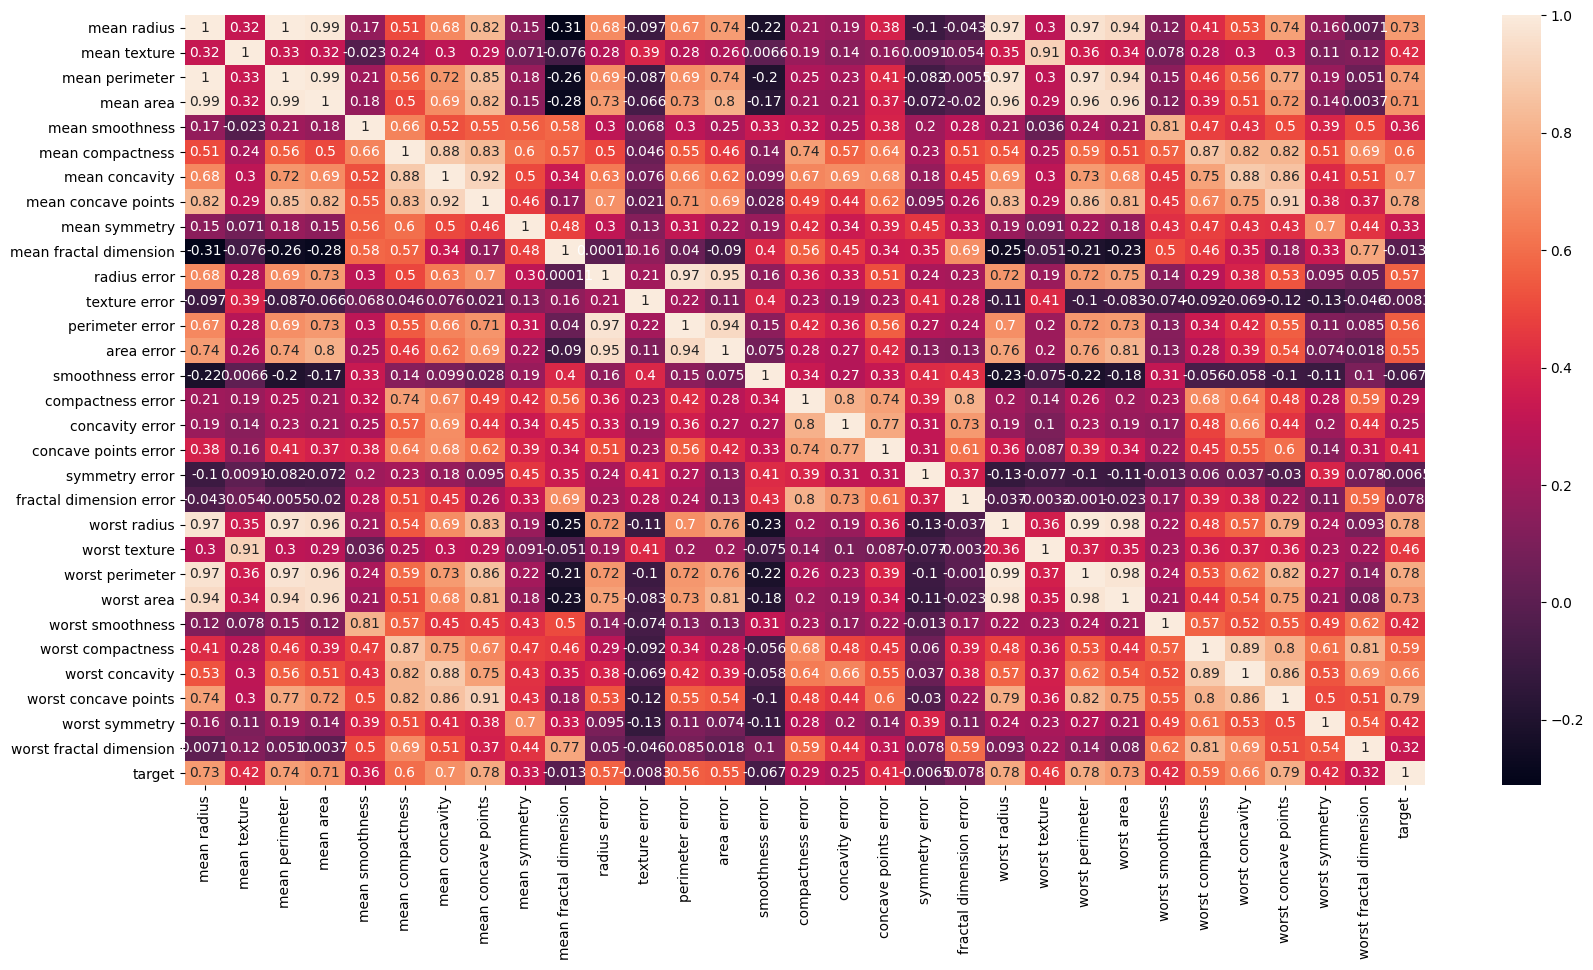

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

<br>
<br>

<br>
<br>

<br>
<br>


## Model Definition and Training

In [13]:
X = df.drop('target', axis=1)
y = df.target

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = pd.DataFrame(sc.transform(X_train), columns=X_train.columns, index=X_train.index)  # maintain as DataFrame
X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)

In [16]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC

svc = SVC(class_weight='balanced')

params = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0], \
    'kernel': ['poly', 'rbf', 'sigmoid', 'linear'],
    'degree':[2,3,4,5]}

# use an exhaustive search rather than an efficient one that might return different results
# clf = RandomizedSearchCV(svc, params, cv=5, verbose=2, n_jobs=-1, n_iter=1000)
clf = GridSearchCV(svc, params, cv=5, verbose=2, n_jobs=-1)
search = clf.fit(X_train, y_train)
orig_best_estimator = search.best_estimator_
orig_best_estimator

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 673 out of 720 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    1.7s finished


SVC(class_weight='balanced', degree=2)

<br>
<br>

## Fit the model

In [17]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, classification_report

y_pred = orig_best_estimator.predict(X_test)

print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, target_names=cancer['target_names']))

F1 Score: 0.9672131147540983
Accuracy Score: 0.9766081871345029
Recall Score: 0.9672131147540983
              precision    recall  f1-score   support

      benign       0.98      0.98      0.98       110
   malignant       0.97      0.97      0.97        61

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



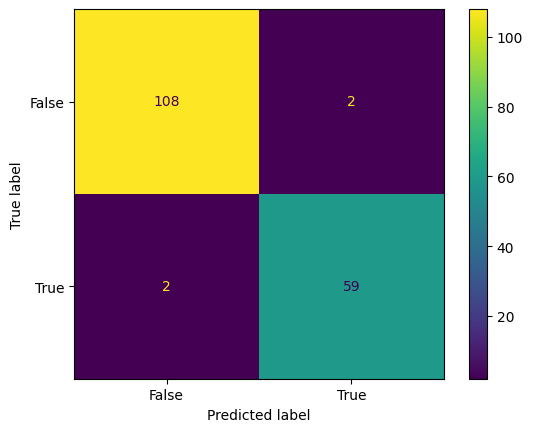

In [18]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion_matrix(y_pred, y_test)
plot_confusion_matrix(orig_best_estimator, X_test, y_test)

<br>
<br>

## ~~~Run a **Series** of Classifier Models to Get an Idea of Performance~~~

In [19]:
import sklearn
sklearn.__version__

'0.23.2'

In [20]:
# import lazypredict
# from lazypredict.Supervised import LazyClassifier
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split

# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)

# display(models)

<br>
<br>

## Drop Constant Features if They Exist

In [21]:
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures

In [22]:
sel = DropConstantFeatures(tol=0.95, variables=None, missing_values='raise')

sel.fit(X_train)

DropConstantFeatures(tol=0.95,
                     variables=['mean radius', 'mean texture', 'mean perimeter',
                                'mean area', 'mean smoothness',
                                'mean compactness', 'mean concavity',
                                'mean concave points', 'mean symmetry',
                                'mean fractal dimension', 'radius error',
                                'texture error', 'perimeter error',
                                'area error', 'smoothness error',
                                'compactness error', 'concavity error',
                                'concave points error', 'symmetry error',
                                'fractal dimension error', 'worst radius',
                                'worst texture', 'worst perimeter',
                                'worst area', 'worst smoothness',
                                'worst compactness', 'worst concavity',
                                'worst concave 

<br>
<br>

No Constant Features to drop so we will move on

In [23]:
sel.features_to_drop_

[]

<br>
<br>

## Dropping Duplicate Features

In [24]:
sel = DropDuplicateFeatures(variables=None, missing_values='raise')
sel.fit(X_train)

DropDuplicateFeatures(missing_values='raise',
                      variables=['mean radius', 'mean texture',
                                 'mean perimeter', 'mean area',
                                 'mean smoothness', 'mean compactness',
                                 'mean concavity', 'mean concave points',
                                 'mean symmetry', 'mean fractal dimension',
                                 'radius error', 'texture error',
                                 'perimeter error', 'area error',
                                 'smoothness error', 'compactness error',
                                 'concavity error', 'concave points error',
                                 'symmetry error', 'fractal dimension error',
                                 'worst radius', 'worst texture',
                                 'worst perimeter', 'worst area',
                                 'worst smoothness', 'worst compactness',
                                 'wors

<br>
<br>

No Duplicated Features to drop so we move on

In [25]:
sel.duplicated_feature_sets_

[]

<br>
<br>

## Drop Correlated Features V1

Here we just set a correlation coefficient threshold and drop anything that exceeds it.

In [26]:
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection

# Instantiate the Drop Correlated Features Selector
sel = DropCorrelatedFeatures(
    threshold=0.8,
    method='pearson', 
    missing_values='ignore'
)

sel.fit(X_train)

DropCorrelatedFeatures(variables=['mean radius', 'mean texture',
                                  'mean perimeter', 'mean area',
                                  'mean smoothness', 'mean compactness',
                                  'mean concavity', 'mean concave points',
                                  'mean symmetry', 'mean fractal dimension',
                                  'radius error', 'texture error',
                                  'perimeter error', 'area error',
                                  'smoothness error', 'compactness error',
                                  'concavity error', 'concave points error',
                                  'symmetry error', 'fractal dimension error',
                                  'worst radius', 'worst texture',
                                  'worst perimeter', 'worst area',
                                  'worst smoothness', 'worst compactness',
                                  'worst concavity', 'worst concave poi

<br>
<br>

We find 5 sets of correlated features

In [27]:
sel.correlated_feature_sets_

[{'mean area',
  'mean concave points',
  'mean perimeter',
  'mean radius',
  'worst area',
  'worst perimeter',
  'worst radius'},
 {'mean texture', 'worst texture'},
 {'mean smoothness', 'worst smoothness'},
 {'mean compactness',
  'mean concavity',
  'worst compactness',
  'worst concave points',
  'worst concavity'},
 {'area error', 'perimeter error', 'radius error'}]

<br>
<br>

The number of features to drop, given our model

In [28]:
print(f'Length of Features to Drop: {len(sel.features_to_drop_)}')
print('Features to Drop: ', sel.features_to_drop_)

Length of Features to Drop: 14
Features to Drop:  {'worst texture', 'worst concave points', 'worst area', 'mean concavity', 'mean perimeter', 'worst perimeter', 'worst smoothness', 'mean area', 'mean concave points', 'worst concavity', 'perimeter error', 'worst compactness', 'worst radius', 'area error'}


We don't drop these features as yet because we want to play and compare results to SmartCorrelatedSelection

<br>
<br>

## Dropping Features with SmartCorrelatedSelection, using Random Forest (or any model) to test performance.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import NuSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the RF Classifier backend
rf = RandomForestClassifier(
    n_estimators=10,
    random_state=0,
    n_jobs=20,
)

nusvc = NuSVC()

svc = SVC()

knc = KNeighborsClassifier(n_neighbors=8)



# Instantiate the Smart Correlation Selector with the RF model
sel = SmartCorrelatedSelection(
    variables=None,
    method='pearson',
    threshold=0.8,
    missing_values='raise',
    selection_method='model_performance',
    estimator=rf, #svc, #nusvc, #knc
    scoring='roc_auc',
    cv=5,
)

sel.fit(X_train, y_train)

SmartCorrelatedSelection(cv=5,
                         estimator=RandomForestClassifier(n_estimators=10,
                                                          n_jobs=20,
                                                          random_state=0),
                         missing_values='raise',
                         selection_method='model_performance',
                         variables=['mean radius', 'mean texture',
                                    'mean perimeter', 'mean area',
                                    'mean smoothness', 'mean compactness',
                                    'mean concavity', 'mean concave points',
                                    'mean symmetry', 'mean fractal dimension',
                                    'radius error', 'texture error',
                                    'perimeter error', 'area error',
                                    'smoothness error', 'compactness error',
                                    'concavity error', 'co

In [30]:
group = sel.correlated_feature_sets_
display(group, len(group))

[{'mean area',
  'mean concave points',
  'mean perimeter',
  'mean radius',
  'worst area',
  'worst perimeter',
  'worst radius'},
 {'mean texture', 'worst texture'},
 {'mean smoothness', 'worst smoothness'},
 {'mean compactness',
  'mean concavity',
  'worst compactness',
  'worst concave points',
  'worst concavity'},
 {'area error', 'perimeter error', 'radius error'}]

5

<br>
<br>

## Cross Validating the RF Smart Feature Selection method

In [31]:
from sklearn.model_selection import cross_validate

for f in group:
    model= cross_validate(
        rf, #knc, #svc # choose a different model than the one going to finally use
        X_train[f],
        y_train,
        cv=5,
        return_estimator=False,
        scoring='roc_auc'
    )

    print(f, model['test_score'].mean())

{'mean radius', 'worst area', 'mean perimeter', 'worst perimeter', 'mean area', 'mean concave points', 'worst radius'} 0.9683254772876893
{'worst texture', 'mean texture'} 0.7438594689488699
{'mean smoothness', 'worst smoothness'} 0.668824665350011
{'worst concave points', 'mean concavity', 'worst concavity', 'worst compactness', 'mean compactness'} 0.9605411016019311
{'area error', 'radius error', 'perimeter error'} 0.9018423085363179


In [32]:
X_train

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
47     -0.280700     -0.107141       -0.251667  -0.353201         1.376494   
527    -0.524643     -1.625403       -0.551996  -0.552417        -0.464193   
435    -0.042636      0.120955       -0.032393  -0.157602         0.676504   
21     -1.358163     -1.585012       -1.345477  -1.138915         0.419365   
554    -0.365933      2.330633       -0.400125  -0.414383        -1.092754   
..           ...           ...             ...        ...              ...   
8      -0.330664      0.643675       -0.186823  -0.397806         2.197910   
73     -0.095539     -0.789052       -0.061829  -0.204015         0.297939   
400     1.112418      0.453595        1.387342   1.031367         1.890772   
118     0.486397      0.902658        0.589594   0.394237         1.355066   
206    -1.248830     -0.437405       -1.235414  -1.074117         0.883644   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
47           0.402148        0.469188             0.655619       1.173114   
527         -0.758859       -0.726158            -0.573343      -0.418000   
435          0.212612        0.340684             0.425958      -0.490488   
21          -0.723080       -0.726415            -0.722872       0.038676   
554         -0.852274       -0.310190            -0.652952      -0.863801   
..                ...             ...                  ...            ...   
8            1.757915        1.282619             1.182766       1.977732   
73           0.496917       -0.105354             0.060909      -0.515859   
400          3.003440        2.991724             1.870701       1.118748   
118          1.409786        1.634720             1.215761       1.057133   
206         -0.579960       -0.880620            -0.755344       0.469980   

     mean fractal dimension  ...  worst radius  worst texture  \
47                 0.818014  ...     -0.122654       0.414375   
527               -0.657791  ...     -0.566311      -1.033312   
435                0.463150  ...      0.172399       0.889710   
21                 1.012960  ...     -1.294253      -1.635403   
554               -0.810092  ...     -0.506008       1.713624   
..                      ...  ...           ...            ...   
8                  1.750100  ...     -0.161420       0.878035   
73                 0.496657  ...      0.071177      -0.768125   
400                1.332794  ...      0.982181       0.386022   
118                1.661765  ...      0.850807       0.839675   
206                0.068689  ...     -1.253333      -0.374514   

     worst perimeter  worst area  worst smoothness  worst compactness  \
47         -0.129156   -0.211767          2.034236           1.093524   
527        -0.613384   -0.578254         -0.143060          -0.267148   
435         0.215834   -0.004688          1.271742           0.704575   
21         -1.299944   -1.049317         -0.002021          -0.869434   
554        -0.563034   -0.520219         -0.429547          -0.562437   
..               ...         ...               ...                ...   
8          -0.023483   -0.249641          1.668415           1.896788   
73          0.103945   -0.111902          0.381430           0.687664   
400         1.325394    0.814397          2.417687           2.232403   
118         0.725548    0.754101          2.338353           1.587190   
206        -1.239338   -1.017850          0.399060          -0.805042   

     worst concavity  worst concave points  worst symmetry  \
47          1.155073              1.454746        1.673402   
527        -0.430995             -0.103326        0.363454   
435         0.692819              1.055279        0.477867   
21         -0.877117             -0.787928       -0.730933   
554        -0.111315             -0.747216       -0.860269   
..               ...                   ...             ...   
8           1.344513              1.411891        2

This is the same number of features we found using the naive model

In [33]:
print(f'Length of Features to Drop: {len(sel.features_to_drop_)}')
print('Features to Drop: ', sel.features_to_drop_)

Length of Features to Drop: 14
Features to Drop:  ['mean radius', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'worst radius', 'worst texture', 'worst perimeter', 'worst compactness', 'worst concavity']


We start with 30 features before dropping...

In [34]:
len(X_train.columns)

30

... and we're left with 16 after dropping

In [35]:
X_train_d = X_train.drop(sel.features_to_drop_, axis=1)
X_test_d = X_test.drop(sel.features_to_drop_, axis=1)

display(len(X_train_d.columns), X_train_d.columns)

16

Index(['mean texture', 'mean symmetry', 'mean fractal dimension',
       'texture error', 'area error', 'smoothness error', 'compactness error',
       'concavity error', 'concave points error', 'symmetry error',
       'fractal dimension error', 'worst area', 'worst smoothness',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

After dropping correlated features, we are left with 16 of them
... that's nearly 50% of our original features.  Not bad!

<br>
<br>

## We rerun LazyClassifier to check performance of the various models

Notice that while the top models are still 98% accurate, the bottom half of the table has been reshuffled and accuracy has degraded somewhat (~2%).

In [36]:
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train_d, X_test_d, y_train, y_test)

# display(models)

<br>
<br>

### We can see far fewer features, some with still retaining moderate correlation

<AxesSubplot:>

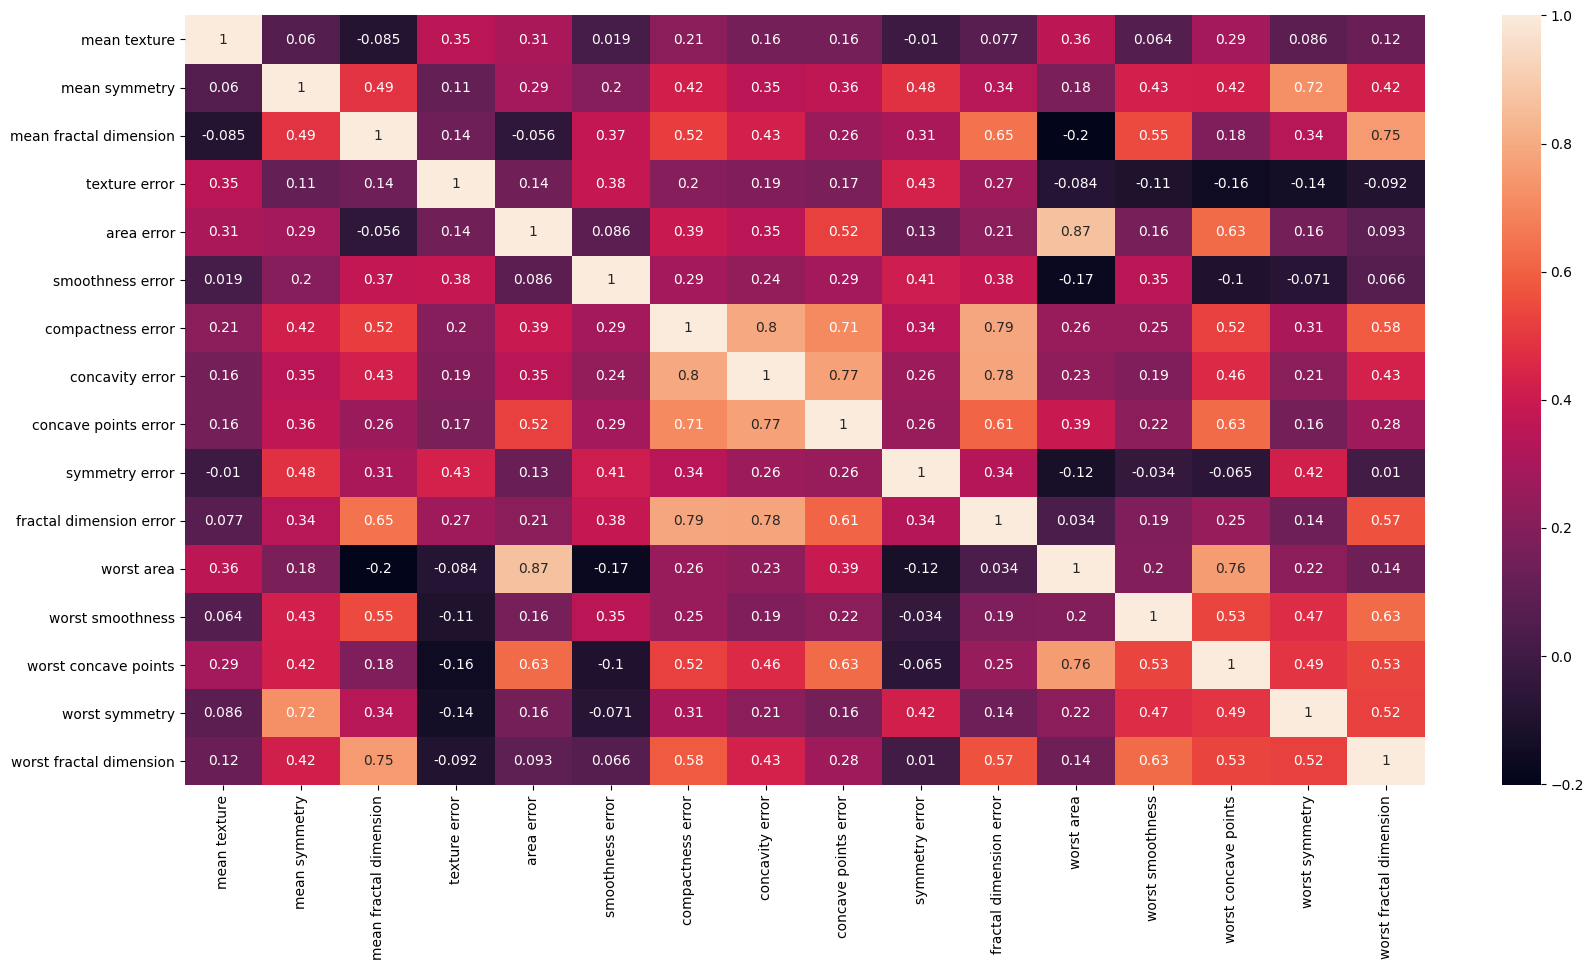

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_d.corr(), annot=True)

<br>
<br>

## Here we see that most of the strongly correlated features have been removed.

Interestingly, `Area Error <--> Worst Area` has been retained with a pearson correlation coefficient of 0.87

It turns out that dropping Worst Perimeter decreases our model's performance (accuracy & F1) by between 2% and 3% ... so we keep it.  


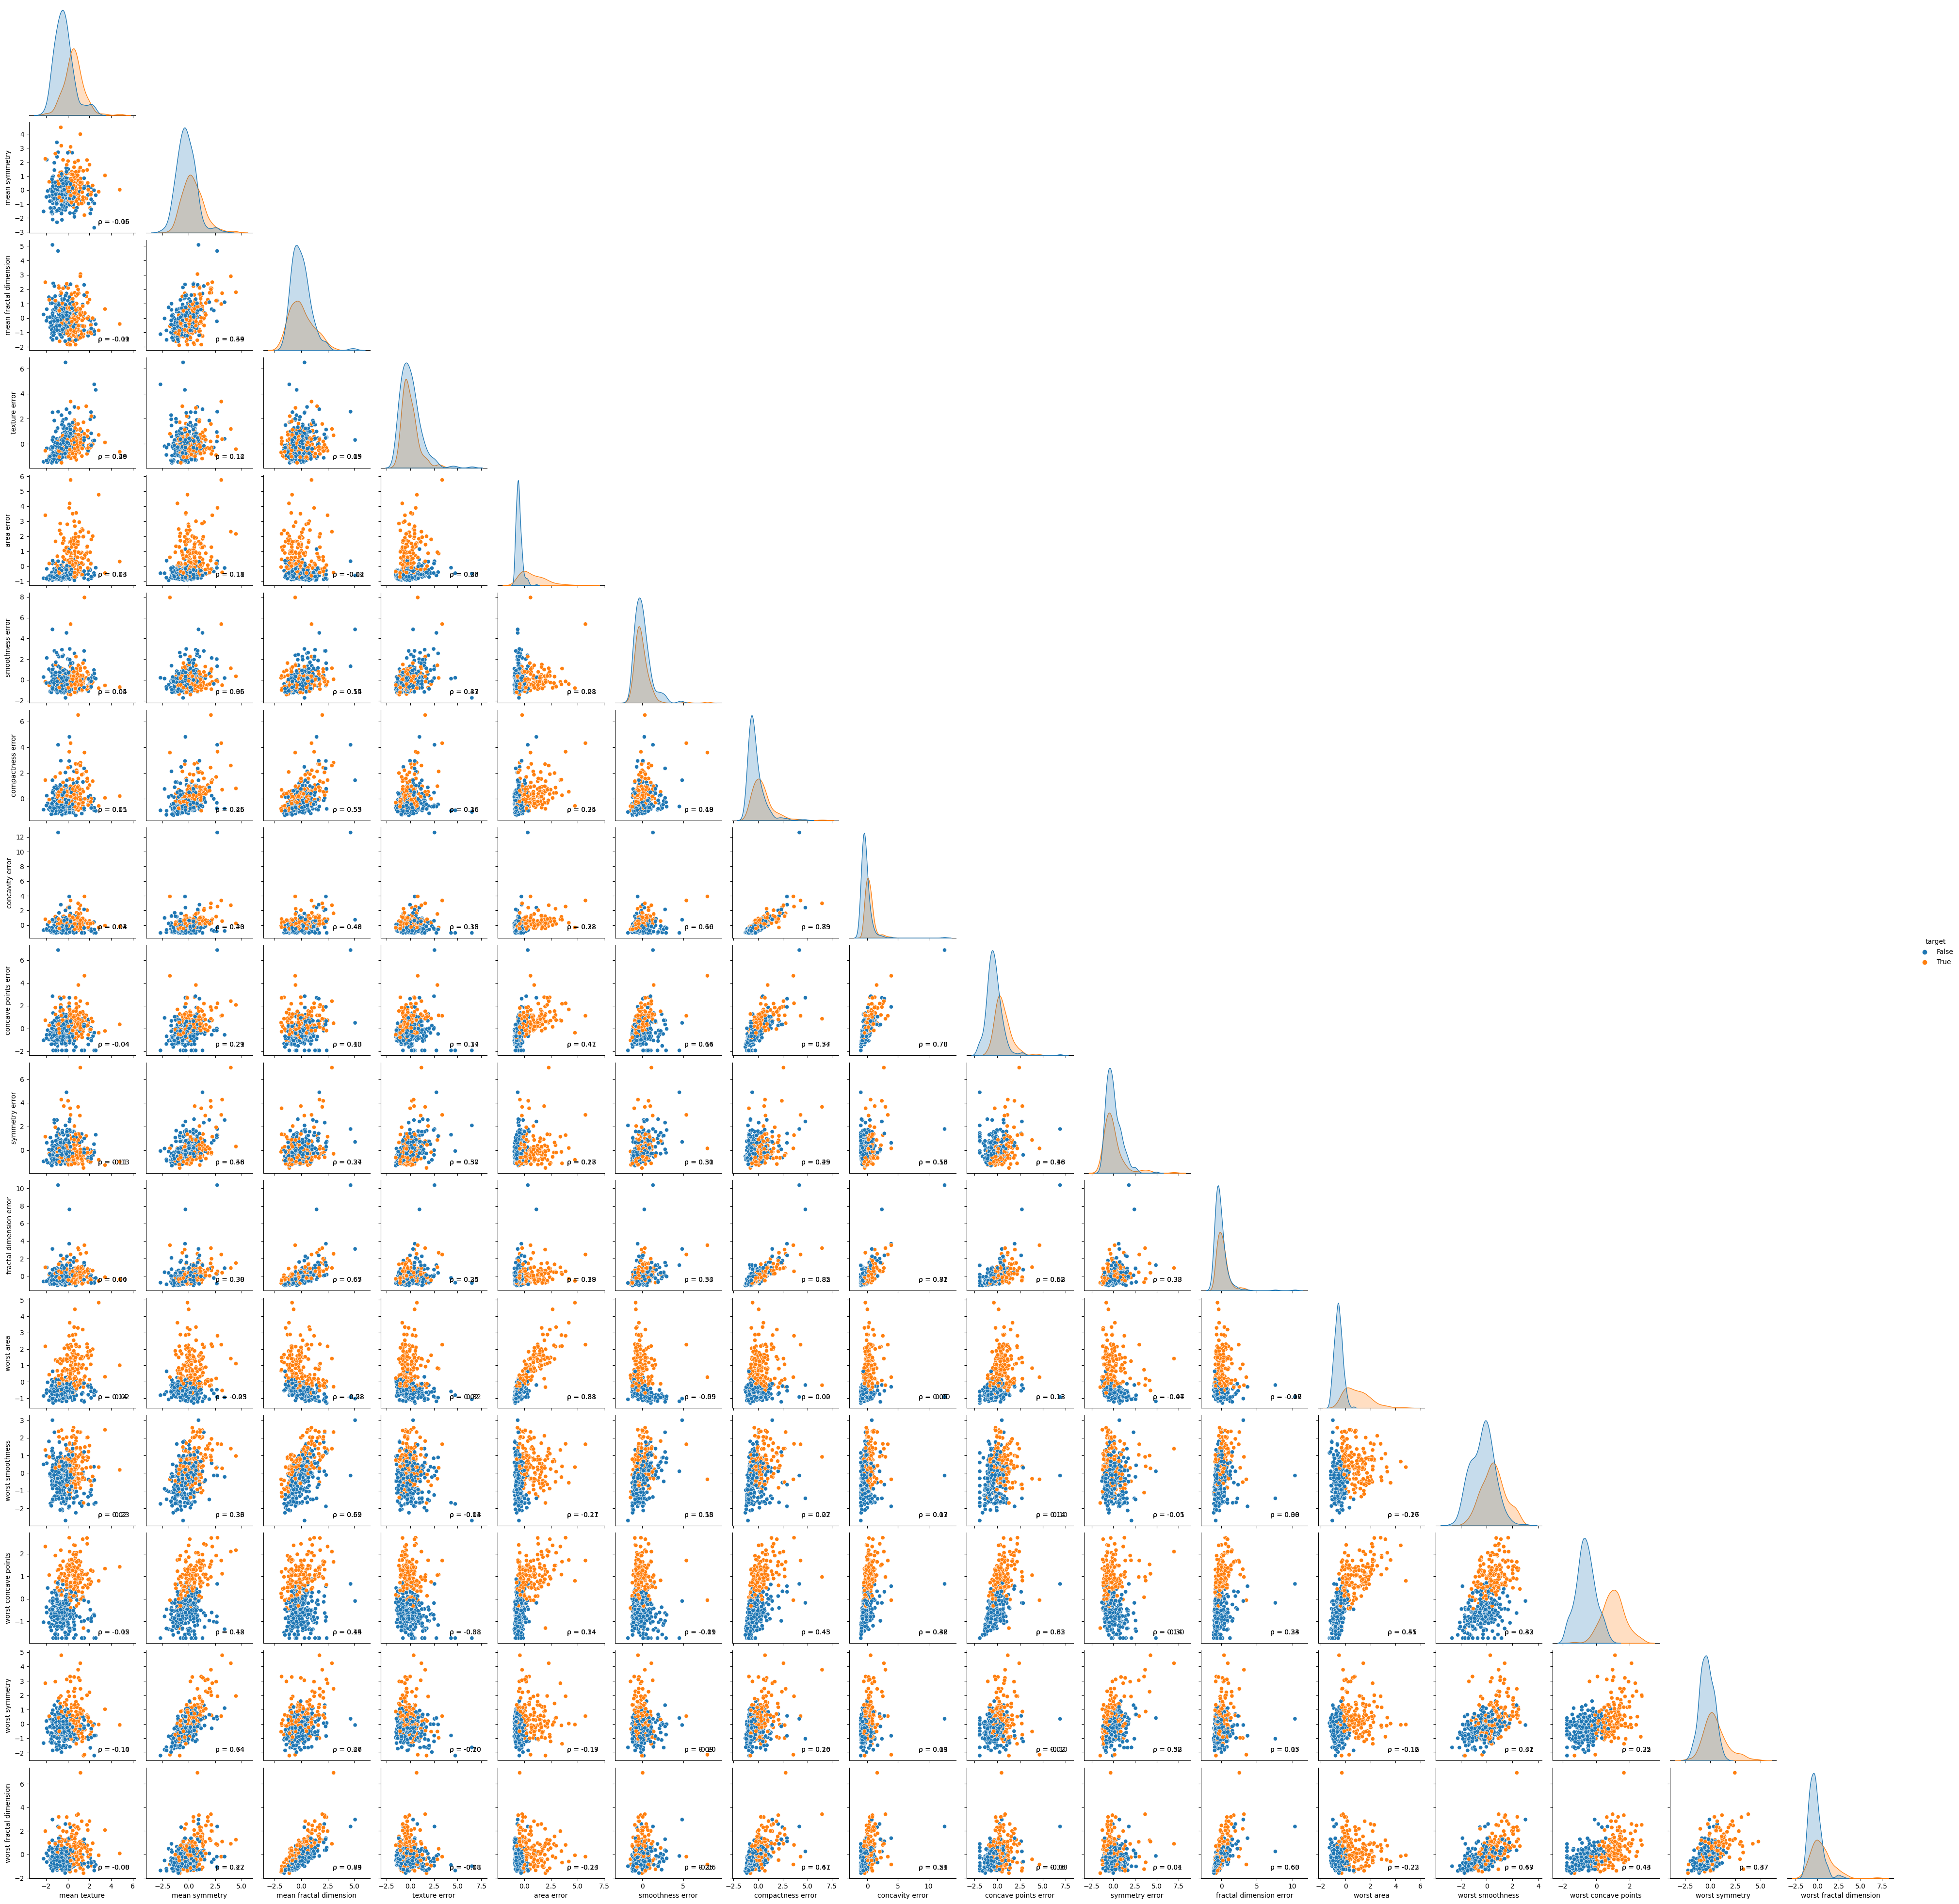

In [38]:
from scipy.stats import pearsonr

plot = sns.pairplot(pd.concat([X_train_d, y_train], axis=1), hue='target', corner=True)
plot.map_lower(corrfunc)
plt.show()

In [39]:
X_train_d

mean texture  mean symmetry  mean fractal dimension  texture error  \
47      -0.107141       1.173114                0.818014      -0.572575   
527     -1.625403      -0.418000               -0.657791      -1.278057   
435      0.120955      -0.490488                0.463150      -0.466930   
21      -1.585012       0.038676                1.012960      -0.425275   
554      2.330633      -0.863801               -0.810092       0.253973   
..            ...            ...                     ...            ...   
8        0.643675       1.977732                1.750100      -0.380606   
73      -0.789052      -0.515859                0.496657      -1.056841   
400      0.453595       1.118748                1.332794      -0.783511   
118      0.902658       1.057133                1.661765      -0.256527   
206     -0.437405       0.469980                0.068689       0.222067   

     area error  smoothness error  compactness error  concavity error  \
47    -0.419836         -0.149738          -0.059208        -0.050724   
527   -0.872019         -1.088005          -0.889602        -0.751386   
435   -0.579482         -0.550583          -0.378118        -0.299015   
21    -0.672609          0.861918          -0.588188        -0.367984   
554   -0.639202          0.468971          -0.166292         0.291710   
..          ...               ...                ...              ...   
8     -0.417767         -0.413348           0.623082         0.172737   
73    -0.446444         -0.747057          -0.217785        -0.445920   
400    0.090440          0.056608           0.749476         1.073479   
118    0.596577          0.563423           0.900446         0.999337   
206   -0.772240          0.899106          -0.695272        -0.777491   

     concave points error  symmetry error  fractal dimension error  \
47               0.100393       -0.367517                -0.011203   
527             -0.969480       -1.099694                -0.913123   
435             -0.330727       -0.987602                -0.326894   
21               0.444222       -0.028855                -0.278570   
554             -0.655695       -0.424756                -0.344719   
..                    ...             ...                      ...   
8                0.118753        0.109471                 0.030784   
73              -0.390981       -0.991179                -0.214402   
400             -0.173334       -0.548773                 0.565519   
118              0.392480       -0.663250                 0.916068   
206             -0.671218        0.189367                -0.475036   

     worst area  worst smoothness  worst concave points  worst symmetry  \
47    -0.211767          2.034236              1.454746        1.673402   
527   -0.578254         -0.143060             -0.103326        0.363454   
435   -0.004688          1.271742              1.055279        0.477867   
21    -1.049317         -0.002021             -0.787928       -0.730933   
554   -0.520219         -0.429547             -0.747216       -0.860269   
..          ...               ...                   ...             ...   
8     -0.249641          1.668415              1.411891        2.466003   
73    -0.111902          0.381430              0.375728       -0.500448   
400    0.814397          2.417687              1.264961        0.587306   
118    0.754101          2.338353              1.372097        0.635392   
206   -1.017850          0.399060             -0.885728        0.162816   

     worst fractal dimension  
47                  1.927756  
527                -0.418850  
435                 1.234618  
21                 -0.317674  
554                -0.614494  
..                       ...  
8                   1.329645  
73                  1.094873  
400                 2.033962  
118                 2.335813  
206                -0.537354  

[398 rows x 16 columns]

<br>
<br>

<br>
<br>

## We re-run the model to see how performance may have been impacted

We run a RandomizedSearch to Find "the best" Parameters

In [40]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

svc = SVC(class_weight='balanced')

params = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0], \
    'kernel': ['poly', 'rbf', 'sigmoid', 'linear'],
    'degree':[2,3,4,5]}

# clf = RandomizedSearchCV(svc, params, cv=5, verbose=2, n_jobs=-1, n_iter=1000)
clf = GridSearchCV(svc, params, cv=5, verbose=2, n_jobs=-1)
search = clf.fit(X_train_d, y_train)
search.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    2.9s finished


SVC(C=0.1, class_weight='balanced', degree=2, kernel='linear')

<br>
<br>

## Look at the Model's Performance

In [41]:
y_pred_d = search.best_estimator_.predict(X_test_d)
print(classification_report(y_test, y_pred_d, target_names=cancer['target_names']))
print('------------------------------------------------')
print(f'F1 Score:             {f1_score(y_test, y_pred_d)}')
print(f'Accuracy Score:       {accuracy_score(y_test, y_pred_d)}')
print(f'Recall Score:         {recall_score(y_test, y_pred_d)}')

              precision    recall  f1-score   support

      benign       0.98      0.99      0.99       110
   malignant       0.98      0.97      0.98        61

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

------------------------------------------------
F1 Score:             0.9752066115702478
Accuracy Score:       0.9824561403508771
Recall Score:         0.9672131147540983


<br>
<br>

## Showing the old model's performance for reference:

In [42]:
y_pred = orig_best_estimator.predict(X_test)
print(classification_report(y_test, y_pred, target_names=cancer['target_names']))
print('------------------------------------------------')
print(f'F1 Score:             {f1_score(y_test, y_pred)}')
print(f'Accuracy Score:       {accuracy_score(y_test, y_pred)}')
print(f'Recall Score:         {recall_score(y_test, y_pred)}')

              precision    recall  f1-score   support

      benign       0.98      0.98      0.98       110
   malignant       0.97      0.97      0.97        61

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

------------------------------------------------
F1 Score:             0.9672131147540983
Accuracy Score:       0.9766081871345029
Recall Score:         0.9672131147540983


<br>
<br>

## Findings:

1. In this situation, we were able to decrease dimensionality by almost 47%
2. We were also able to maintain the exact same or better performance across accuracy and F1.

To be able to maintain a high level of accuracy and drop the dimensionality was a useful experiment. 